In [182]:
# import libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
import os

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [183]:
# path to the data
path = 'data'

# data
linkedin_data = 'Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.xls'
twitter_data = 'Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.xls'

###  LINKEDIN

In [184]:
# write a function to load the data
def read_data(path,data):
    data = pd.read_excel(os.path.join(path,data),
                            engine="xlrd")
    return data

df_linkedIn = read_data(path,linkedin_data)
df_linkedIn.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 12:03 pm,7085212016608449536,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts
1,2023-12-07 20:00:00,7084969706024999936,LinkedIn,Post,Text

In [185]:
# total data in the linkedIn data
len(df_linkedIn)

7760

In [186]:
df_linkedIn.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 147 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         7760 non-null   object 
 1   Post ID                                      7760 non-null   int64  
 2   Network                                      7760 non-null   object 
 3   Post Type                                    7760 non-null   object 
 4   Content Type                                 7760 non-null   object 
 5   Profile                                      7760 non-null   object 
 6   Sent by                                      7760 non-null   object 
 7   Link                                         7756 non-null   object 
 8   Post                                         7729 non-null   object 
 9   Linked Content                               107 non-null    object 
 10 

In [187]:
## print all the columnns in the data
print(df_linkedIn.columns[df_linkedIn.isna().all()])

Index(['Viral Impressions', 'Non-viral Impressions', 'Paid Impressions',
       'Fan Impressions', 'Fan Organic Impressions', 'Fan Paid Impressions',
       'Non-fan Impressions', 'Non-fan Organic Impressions',
       'Non-fan Paid Impressions', 'Reach',
       ...
       'Video Added to Playlists', 'Subscribers Lost from Video',
       'Video Removed from Playlists', 'Annotation Impressions',
       'Annotation Clickable Impressions', 'Annotation Closable Impressions',
       'Annotation Closes', 'Card Impressions', 'Card Teaser Impressions',
       'Card Teaser Clicks'],
      dtype='object', length=122)


#### Data Cleaning and Pre-processing: 

In [188]:
# drop all columns  (datasets) with a null value of less than 1000
df_linkedIn = df_linkedIn.dropna(axis=1, thresh=1000)

In [190]:
# view the columns with lesser null values
df_linkedIn.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)', 'Tags'],
      dtype='object')

In [191]:
df_linkedIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              7760 non-null   object 
 1   Post ID                           7760 non-null   int64  
 2   Network                           7760 non-null   object 
 3   Post Type                         7760 non-null   object 
 4   Content Type                      7760 non-null   object 
 5   Profile                           7760 non-null   object 
 6   Sent by                           7760 non-null   object 
 7   Link                              7756 non-null   object 
 8   Post                              7729 non-null   object 
 9   Impressions                       6332 non-null   float64
 10  Organic Impressions               6332 non-null   float64
 11  Engagement Rate (per Impression)  6332 non-null   float64
 12  Engage

In [192]:
df_linkedIn.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags
0,7/13/2023 12:03 pm,7085212016608449536,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts
1,2023-12-07 20:00:00,7084969706024999936,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
2,2023-12-07 19:00:00,7084954641788010496,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts
3,2023-11-07 14:49:00,7084529022105230336,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts
4,2023-11-07 09:17:00,7084445462967069696,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN


###  Categorical Variables

In [193]:
df_linkedIn.Network.unique()

array(['LinkedIn'], dtype=object)

In [194]:
df_linkedIn['Post Type'].unique()

array(['Post'], dtype=object)

In [195]:
df_linkedIn['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Poll', 'Document', 'Link'], dtype=object)

In [196]:
df_linkedIn['Profile'].unique()

array(['Stanbic IBTC'], dtype=object)

In [197]:
df_linkedIn['Post ID'].unique()

array([7085212016608449536, 7084969706024999936, 7084954641788010496, ...,
       5869784625840159744, 5869425201195809792, 5869021915485599744],
      dtype=int64)

In [198]:
df_linkedIn['Sent by'].unique()

array(['Blessing Ubah', 'Kemi Amoo', ' ', 'Damilare Oyekanmi',
       'Sophia Amuka', 'Aramide Salami', 'Dunni Ogunsanya'], dtype=object)

In [199]:
df_linkedIn['Tags'].unique()

array(['CIB Posts', nan, 'Weekly Wealth Posts', 'Enterprise Campaign',
       'BCC', 'CHNW Mass Retail',
       'Chemistry of Wealth, Weekly Wealth Posts', 'CSI Posts',
       'CIB Posts, PMI', 'LATTES', 'LATTES, Weekly Wealth Posts',
       'Asset Management, Weekly Wealth Posts',
       'BCC, Enterprise Campaign', 'Trustees Posts, Weekly Wealth Posts',
       'Pension, Weekly Wealth Posts', 'CIB Brand Campaign, CIB Posts',
       'BCC, Blue Blossom',
       'Insurance Limited Posts, Weekly Wealth Posts',
       'CHNW Mass Retail, Reward4Saving',
       'Insurance Brokers Posts, Weekly Wealth Posts',
       'Fuze Festival, Weekly Wealth Posts', 'Together4ALimb',
       'Insurance Brokers Posts, Stay IN Business Campaign, Weekly Wealth Posts',
       'BCC, Trade Export Webinar',
       'CHNW Mass Retail, Cybersecurity Webinar, Weekly Wealth Posts',
       'CHNW Mass Retail, Weekly Wealth Posts',
       'BCC, Enterprise Academy Monday', 'BCC, Trade Club',
       'Asset Management, Chemi

In [200]:
df_linkedIn = df_linkedIn.drop(columns=['Post ID','Profile','Post Type'],axis=1)
df_linkedIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              7760 non-null   object 
 1   Network                           7760 non-null   object 
 2   Content Type                      7760 non-null   object 
 3   Sent by                           7760 non-null   object 
 4   Link                              7756 non-null   object 
 5   Post                              7729 non-null   object 
 6   Impressions                       6332 non-null   float64
 7   Organic Impressions               6332 non-null   float64
 8   Engagement Rate (per Impression)  6332 non-null   float64
 9   Engagements                       6332 non-null   float64
 10  Reactions                         6332 non-null   float64
 11  Likes                             6332 non-null   float64
 12  Commen

### Format Data

In [201]:
df_linkedIn['Date'] = pd.to_datetime(df_linkedIn['Date'])
df_linkedIn['Content Type'] = pd.Categorical(df_linkedIn['Content Type'])
df_linkedIn['Sent by'] = pd.Categorical(df_linkedIn['Sent by'])


In [202]:
df_linkedIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              7760 non-null   datetime64[ns]
 1   Network                           7760 non-null   object        
 2   Content Type                      7760 non-null   category      
 3   Sent by                           7760 non-null   category      
 4   Link                              7756 non-null   object        
 5   Post                              7729 non-null   object        
 6   Impressions                       6332 non-null   float64       
 7   Organic Impressions               6332 non-null   float64       
 8   Engagement Rate (per Impression)  6332 non-null   float64       
 9   Engagements                       6332 non-null   float64       
 10  Reactions                         6332 non-null 

### TWITTER ANALYSIS

In [203]:
df_twitter =  read_data(path,twitter_data)
df_twitter.head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 10:57 am,1679429829567940096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429829567946759,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o",https://twitter.com/StanbicIBTC/status/1679429829567946759/photo/1,445.00,445.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,345718.00,0.04,nan,16.00,4.00,4.00,nan,nan,nan,nan,nan,nan,2.00,1.00,nan,nan,nan,9.00,9.00,1.00,0.00,7.00,1.00,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [204]:
df_twitter.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 147 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         8529 non-null   object 
 1   Post ID                                      8529 non-null   int64  
 2   Network                                      8529 non-null   object 
 3   Post Type                                    8529 non-null   object 
 4   Content Type                                 8529 non-null   object 
 5   Profile                                      8529 non-null   object 
 6   Sent by                                      8529 non-null   object 
 7   Link                                         8481 non-null   object 
 8   Post                                         8529 non-null   object 
 9   Linked Content                               4978 non-null   object 
 10 

In [205]:
len(df_twitter)

8529

In [206]:
# drop all columns with a null value of less than 1000
df_twitter = df_twitter.dropna(axis=1, thresh=1000)
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              8529 non-null   object 
 1   Post ID                           8529 non-null   int64  
 2   Network                           8529 non-null   object 
 3   Post Type                         8529 non-null   object 
 4   Content Type                      8529 non-null   object 
 5   Profile                           8529 non-null   object 
 6   Sent by                           8529 non-null   object 
 7   Link                              8481 non-null   object 
 8   Post                              8529 non-null   object 
 9   Linked Content                    4978 non-null   object 
 10  Impressions                       7842 non-null   float64
 11  Organic Impressions               7842 non-null   float64
 12  Potent

In [207]:
df_twitter.head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Tags
0,7/13/2023 10:57 am,1679429829567940096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429829567946759,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o",https://twitter.com/StanbicIBTC/status/1679429829567946759/photo/1,445.00,445.00,345718.00,0.04,16.00,4.00,4.00,2.00,1.00,nan,nan,9.00,9.00,1.00,0.00,7.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,CIB Posts
1,2023-12-07 20:03:00,1679204777081860096,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204777081864192,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE",NaN,2961.00,2961.00,347102.00,0.02,52.00,11.00,11.00,20.00,3.00,nan,nan,18.00,18.00,nan,1.00,12.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,NaN


###  Categorical Variables

In [208]:
df_twitter.Network.unique()

array(['Twitter'], dtype=object)

In [209]:
df_twitter['Post Type'].unique()

array(['Tweet'], dtype=object)

In [210]:
df_twitter['Post'].unique()

array(['Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o',
       'What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE',
       'Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://t.co/Dpi7LF0TQK today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE https://t.co/qJwLGZsDEg',
       ...,
       'Now on at the Stanbic IBTC sponsored BIT Hub: "Pushing the Envelope" hosted by Google @SMWLagos #smwlagos #smwEnvelopes',
       "'@SMWLagos starts today. We're proud sponsors of the BIT Hub at Porsche Centre, VI. Here's today's events #SMWLagos http://t.co/QJRRJQPT",
       'We are proud to be sponsors of the BIT hub at #SMWLagos (@

In [211]:
df_twitter['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Link'], dtype=object)

In [212]:
df_twitter['Profile'].unique()

array(["'@StanbicIBTC"], dtype=object)

In [213]:
df_twitter['Sent by'].unique()

array(['Sophia Amuka', 'Blessing Ubah', 'Kemi Amoo', 'Damilare Oyekanmi',
       ' ', 'Lilian Ibekwe', 'Rebecca Oyebode', 'Aramide Salami',
       'Kanayo Obiano', 'Philip Nwagwunor', 'Dunni Ogunsanya',
       'Patience Nnaji'], dtype=object)

In [214]:
df_twitter['Tags'].unique()

array(['CIB Posts', nan, 'Weekly Wealth Posts',
       'Insurance Limited Posts, Weekly Wealth Posts',
       'Enterprise Campaign', 'BCC', 'Pension, Weekly Wealth Posts',
       'CHNW Mass Retail', 'Asset Management, Weekly Wealth Posts',
       'Fuze Festival, Weekly Wealth Posts', 'CSI Posts',
       'Chemistry of Wealth, Weekly Wealth Posts',
       'Trustees Posts, Weekly Wealth Posts', 'CIB Posts, PMI', 'LATTES',
       'BCC, Enterprise Campaign', 'LATTES, Weekly Wealth Posts',
       'CIB Brand Campaign, CIB Posts', 'BCC, Blue Blossom',
       'CHNW Mass Retail, Reward4Saving',
       'Insurance Brokers Posts, Weekly Wealth Posts', 'Together4ALimb',
       'BCC, Trade Export Webinar',
       'CHNW Mass Retail, Weekly Wealth Posts',
       'CHNW Mass Retail, Cybersecurity Webinar, Weekly Wealth Posts',
       'BCC, Enterprise Academy Monday', 'Fuze Festival',
       'Fuze Festival, Pension', 'BCC, Trade Club',
       'Asset Management, Chemistry of Wealth, Weekly Wealth Posts',
 

In [215]:
df_twitter['Linked Content'].unique()

array(['https://twitter.com/StanbicIBTC/status/1679429829567946759/photo/1',
       nan,
       'https://bit.ly/StanbicIBTCHomeLoans, https://twitter.com/StanbicIBTC/status/1679189012798660608/photo/1, https://twitter.com/StanbicIBTC/status/1679189012798660608/photo/1, https://twitter.com/StanbicIBTC/status/1679189012798660608/photo/1, https://twitter.com/StanbicIBTC/status/1679189012798660608/photo/1',
       ..., 'http://bit.ly/13hxcpU', 'http://bit.ly/X5GFgB',
       'http://new.livestream.com/smwlagos/events/1862306'], dtype=object)

In [216]:
df_twitter['Link'].unique()

array(['https://twitter.com/StanbicIBTC/status/1679429829567946759',
       'https://twitter.com/StanbicIBTC/status/1679204777081864192',
       'https://twitter.com/StanbicIBTC/status/1679189012798660608', ...,
       'https://twitter.com/StanbicIBTC/status/303448511721132033',
       'https://twitter.com/StanbicIBTC/status/303413997238099969',
       'https://twitter.com/StanbicIBTC/status/303051588157714432'],
      dtype=object)

In [217]:
df_twitter = df_twitter.drop(columns=['Post ID','Profile','Post Type'],axis=1)
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              8529 non-null   object 
 1   Network                           8529 non-null   object 
 2   Content Type                      8529 non-null   object 
 3   Sent by                           8529 non-null   object 
 4   Link                              8481 non-null   object 
 5   Post                              8529 non-null   object 
 6   Linked Content                    4978 non-null   object 
 7   Impressions                       7842 non-null   float64
 8   Organic Impressions               7842 non-null   float64
 9   Potential Reach                   8449 non-null   float64
 10  Engagement Rate (per Impression)  7841 non-null   float64
 11  Engagements                       7842 non-null   float64
 12  Reacti

In [218]:
df_twitter['Date'] = pd.to_datetime(df_twitter['Date'])
df_twitter['Content Type'] = pd.Categorical(df_twitter['Content Type'])
df_twitter['Sent by'] = pd.Categorical(df_twitter['Sent by'])

In [219]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              8529 non-null   datetime64[ns]
 1   Network                           8529 non-null   object        
 2   Content Type                      8529 non-null   category      
 3   Sent by                           8529 non-null   category      
 4   Link                              8481 non-null   object        
 5   Post                              8529 non-null   object        
 6   Linked Content                    4978 non-null   object        
 7   Impressions                       7842 non-null   float64       
 8   Organic Impressions               7842 non-null   float64       
 9   Potential Reach                   8449 non-null   float64       
 10  Engagement Rate (per Impression)  7841 non-null 

Join Data

In [220]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              8529 non-null   datetime64[ns]
 1   Network                           8529 non-null   object        
 2   Content Type                      8529 non-null   category      
 3   Sent by                           8529 non-null   category      
 4   Link                              8481 non-null   object        
 5   Post                              8529 non-null   object        
 6   Linked Content                    4978 non-null   object        
 7   Impressions                       7842 non-null   float64       
 8   Organic Impressions               7842 non-null   float64       
 9   Potential Reach                   8449 non-null   float64       
 10  Engagement Rate (per Impression)  7841 non-null 

In [221]:
df_linkedIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              7760 non-null   datetime64[ns]
 1   Network                           7760 non-null   object        
 2   Content Type                      7760 non-null   category      
 3   Sent by                           7760 non-null   category      
 4   Link                              7756 non-null   object        
 5   Post                              7729 non-null   object        
 6   Impressions                       6332 non-null   float64       
 7   Organic Impressions               6332 non-null   float64       
 8   Engagement Rate (per Impression)  6332 non-null   float64       
 9   Engagements                       6332 non-null   float64       
 10  Reactions                         6332 non-null 

In [222]:
merged_data = pd.concat([df_linkedIn,df_twitter])
merged_data.head()

,Date,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
0,2023-07-13 12:03:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2023-12-07 20:00:00,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2023-12-07 19:00:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2023-11-07 14:49:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2023-11-07 09:17:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [223]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['Date_'] = merged_data['Date'].dt.strftime('%Y-%m-%d')
merged_data['Time'] = merged_data['Date'].dt.time
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Content Type'] = pd.Categorical(merged_data['Content Type'])
merged_data['Sent by'] = pd.Categorical(merged_data['Sent by'])

In [224]:
merged_data.head()

,Date,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Date_,Time,Year
0,2023-07-13 12:03:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-07-13,12:03:00,2023
1,2023-12-07 20:00:00,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-12-07,20:00:00,2023
2,2023-12-07 19:00:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-12-07,19:00:00,2023
3,2023-11-07 14:49:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-11-07,14:49:00,2023
4,2023-11-07 09:17:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-11-07,09:17:00,2023


In [225]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16289 entries, 0 to 8528
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              16289 non-null  datetime64[ns]
 1   Network                           16289 non-null  object        
 2   Content Type                      16289 non-null  category      
 3   Sent by                           16289 non-null  category      
 4   Link                              16237 non-null  object        
 5   Post                              16258 non-null  object        
 6   Impressions                       14174 non-null  float64       
 7   Organic Impressions               14174 non-null  float64       
 8   Engagement Rate (per Impression)  14173 non-null  float64       
 9   Engagements                       14174 non-null  float64       
 10  Reactions                         14174 non-nul

In [226]:
df = merged_data.copy()
df.head()

,Date,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Date_,Time,Year
0,2023-07-13 12:03:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-07-13,12:03:00,2023
1,2023-12-07 20:00:00,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-12-07,20:00:00,2023
2,2023-12-07 19:00:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-12-07,19:00:00,2023
3,2023-11-07 14:49:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-11-07,14:49:00,2023
4,2023-11-07 09:17:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-11-07,09:17:00,2023


In [227]:
# List of column names
float_columns = [
    'Impressions', 'Organic Impressions', 'Engagement Rate (per Impression)',
    'Engagements','Reactions', 'Likes', 'Comments', 'Shares', 'Click-Through Rate',
      'Post Link Clicks', 'Post Clicks (All)', 'Potential Reach', 
      'Other Post Clicks', 'Post Media Clicks', 'Post Hashtag Clicks', 
      'Post Detail Expand Clicks', 'Profile Clicks', 'Other Engagements', 
      'App Engagements', 'App Install Attempts', 'App Opens', 'Follows from Post',
        'Unfollows from Post', 'Media Views'
]

# Fill NaN values in the specified columns with 0
df[float_columns] = df[float_columns].fillna(value=0)
df.head()

,Date,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Date_,Time,Year
0,2023-07-13 12:03:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CIB Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-07-13,12:03:00,2023
1,2023-12-07 20:00:00,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-12-07,20:00:00,2023
2,2023-12-07 19:00:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-12-07,19:00:00,2023
3,2023-11-07 14:49:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-11-07,14:49:00,2023
4,2023-11-07 09:17:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-11-07,09:17:00,2023


In [228]:
# List of column names
float_columns = [
    'Impressions', 'Organic Impressions', 'Engagement Rate (per Impression)',
    'Engagements','Reactions', 'Likes', 'Comments', 'Shares', 'Click-Through Rate',
      'Post Link Clicks', 'Post Clicks (All)', 'Potential Reach', 
      'Other Post Clicks', 'Post Media Clicks', 'Post Hashtag Clicks', 
      'Post Detail Expand Clicks', 'Profile Clicks', 'Other Engagements', 
      'App Engagements', 'App Install Attempts', 'App Opens', 'Follows from Post',
        'Unfollows from Post', 'Media Views'
]

# covnert alll the data to a absolute figure
df[float_columns] = df[float_columns].applymap(abs)

In [229]:
df = df[df['Year']>= 2020]
len(df)

9378

In [230]:
df['Tags'] = df.Tags.fillna('No Tag')
df.head()

,Date,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Date_,Time,Year
0,2023-07-13 12:03:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CIB Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-07-13,12:03:00,2023
1,2023-12-07 20:00:00,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,No Tag,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-12-07,20:00:00,2023
2,2023-12-07 19:00:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-12-07,19:00:00,2023
3,2023-11-07 14:49:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-11-07,14:49:00,2023
4,2023-11-07 09:17:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,No Tag,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-11-07,09:17:00,2023


In [231]:
columns_rearrrange = ['Date','Date_',
       'Time', 'Year', 'Network', 'Content Type', 'Sent by', 'Link', 'Post',
       'Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)', 'Tags', 'Linked Content', 'Potential Reach',
       'Other Post Clicks', 'Post Media Clicks', 'Post Hashtag Clicks',
       'Post Detail Expand Clicks', 'Profile Clicks', 'Other Engagements',
       'App Engagements', 'App Install Attempts', 'App Opens',
       'Follows from Post', 'Unfollows from Post', 'Media Views']

In [232]:
# Creating a new DataFrame with specific rows and columns
df = df.iloc[1:][columns_rearrrange]
df.head()

,Date,Date_,Time,Year,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
1,2023-12-07 20:00:00,2023-12-07,20:00:00,2023,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,No Tag,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2023-12-07 19:00:00,2023-12-07,19:00:00,2023,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2023-11-07 14:49:00,2023-11-07,14:49:00,2023,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2023-11-07 09:17:00,2023-11-07,09:17:00,2023,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,No Tag,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2023-10-07 18:04:00,2023-10-07,18:04:00,2023,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084215735241052161,"Hey CEOs, it‚Äôs time to say goodbye to complexities and hello to seamless operations.\nStay Tuned! üòâ\n#ITCANBE",343.00,343.00,0.02,7.00,0.00,0.00,0.00,0.00,0.02,7.00,7.00,Enterprise Campaign,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Exploratory Data Analysis 

* 

In [233]:
# which conttne type has the higest media view on Twitter
df.groupby(['Content Type', 'Network']).sum()

Year  Impressions  Organic Impressions  \
Content Type Network                                                 
Document     LinkedIn    2023.00      1438.00              1438.00   
             Twitter         nan          nan                  nan   
Link         LinkedIn   18187.00      7035.00              7035.00   
             Twitter   129415.00    117232.00            117232.00   
Photo        LinkedIn 7949680.00   3347696.00           3347696.00   
             Twitter  7197836.00  11688466.00          11688466.00   
Poll         LinkedIn    4046.00     44714.00             44714.00   
             Twitter         nan          nan                  nan   
Text         LinkedIn  268920.00    139579.00            139579.00   
             Twitter   345656.00    647317.00            647317.00   
Video        LinkedIn 1692036.00    987428.00            987428.00   
             Twitter  1346358.00   1749106.00           1749106.00   

                       Engagement Rate (per Impression)  Engagements  \
Content Type Network                                                   
Document     LinkedIn                              0.18       260.00   
             Twitter                                nan          nan   
Link         LinkedIn                              0.23       227.00   
             Twitter                               2.37      4357.00   
Photo        LinkedIn                            134.42    195458.00   
             Twitter                             106.65    421727.00   
Poll         LinkedIn                              0.05      1230.00   
             Twitter                                nan          nan   
Text         LinkedIn                              2.16      5028.00   
             Twitter                               6.06     26240.00   
Video        LinkedIn                             19.96     27840.00   
             Twitter                              24.91     68565.00   

                       Reactions    Likes  Comments   Shares  \
Content Type Network                                           
Document     LinkedIn       9.00     9.00      0.00     0.00   
             Twitter         nan      nan       nan      nan   
Link         LinkedIn      82.00    82.00      1.00    10.00   
             Twitter      432.00   432.00    346.00   160.00   
Photo        LinkedIn   56564.00 56564.00   3185.00  3430.00   
             Twitter    60692.00 60692.00  30657.00 17651.00   
Poll         LinkedIn      31.00    31.00      5.00     0.00   
             Twitter         nan      nan       nan      nan   
Text         LinkedIn    1520.00  1520.00    219.00    17.00   
             Twitter     2359.00  2359.00   1855.00   640.00   
Video        LinkedIn   13411.00 13411.00   2407.00  1030.00   
             Twitter    18581.00 18581.00   4928.00  4217.00   

                       Click-Through Rate  Post Link Clicks  \
Content Type Network                                          
Document     LinkedIn                0.17            251.00   
             Twitter                  nan               nan   
Link         LinkedIn                0.14            134.00   
             Twitter                 0.73           1130.00   
Photo        LinkedIn               68.90         132305.00   
             Twitter                 5.05          13445.00   
Poll         LinkedIn                0.05           1194.00   
             Twitter                  nan               nan   
Text         LinkedIn                1.22           3272.00   
             Twitter                 0.00             11.00   
Video        LinkedIn                6.56          11078.00   
             Twitter                 0.79           1733.00   

                       Post Clicks (All)  Potential Reach  Other Post Clicks  \
Content Type Network                                                           
Document     LinkedIn             251.00             0.00               0.00   
             Twitt

In [234]:
network_imp = df.groupby(['Content Type', 'Network']).sum().dropna().reset_index()
network_imp

,Content Type,Network,Year,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
0,Document,LinkedIn,2023.00,1438.00,1438.00,0.18,260.00,9.00,9.00,0.00,0.00,0.17,251.00,251.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Link,LinkedIn,18187.00,7035.00,7035.00,0.23,227.00,82.00,82.00,1.00,10.00,0.14,134.00,134.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Link,Twitter,129415.00,117232.00,117232.00,2.37,4357.00,432.00,432.00,346.00,160.00,0.73,1130.00,3417.00,21995984.00,2287.00,13.00,7.00,2022.00,245.00,2.00,1.00,0.00,1.00,1.00,1.00,16.00
3,Photo,LinkedIn,7949680.00,3347696.00,3347696.00,134.42,195458.00,56564.00,56564.00,3185.00,3430.00,68.90,132305.00,132305.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Photo,Twitter,7197836.00,11688466.00,11688466.00,106.65,421727.00,60692.00,60692.00,30657.00,17651.00,5.05,13445.00,312649.00,1139357105.00,299204.00,160983.00,5054.00,111770.00,21397.00,78.00,0.00,0.00,0.00,74.00,67.00,161002.00
5,Poll,LinkedIn,4046.00,44714.00,44714.00,0.05,1230.00,31.00,31.00,5.00,0.00,0.05,1194.00,1194.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Text,LinkedIn,268920.00,139579.00,139579.00,2.16,5028.00,1520.00,1520.00,219.00,17.00,1.22,3272.00,3272.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Text,Twitter,345656.00,647317.00,647317.00,6.06,26240.00,2359.00,2359.00,1855.00,640.00,0.00,11.00,12968.00,52689546.00,12957.00,8.00,190.00,11064.00,1695.00,8418.00,0.00,0.00,0.00,6.00,8.00,10.00
8,Video,LinkedIn,1692036.00,987428.00,987428.00,19.96,27840.00,13411.00,13411.00,2407.00,1030.00,6.56,11078.00,11078.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Video,Twitter,1346358.00,1749106.00,1749106.00,24.91,68565.00,18581.00,18581.00,4928.00,4217.00,0.79,1733.00,40833.00,221906167.00,39100.00,19390.00,492.00,16092.00,3126.00,6.00,0.00,0.00,0.00,6.00,20.00,109684.00


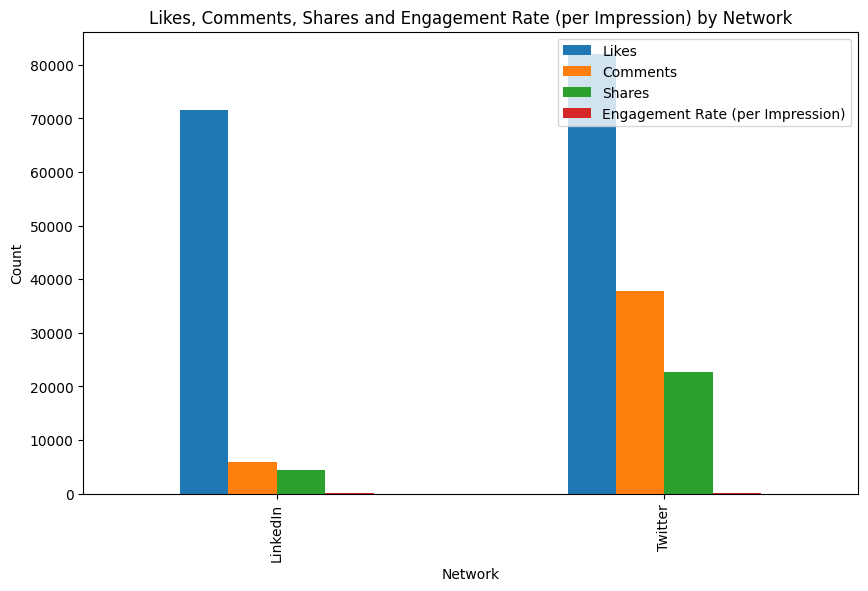

In [235]:
# Group by network and sum the likes, comments, and shares
grouped_data = network_imp.groupby('Network').agg({
    'Likes': 'sum',
    'Comments': 'sum',
    'Shares': 'sum',
    'Engagement Rate (per Impression)': 'sum'
}).reset_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', x='Network', y=['Likes', 'Comments', 'Shares','Engagement Rate (per Impression)'], ax=ax)
plt.title('Likes, Comments, Shares and Engagement Rate (per Impression) by Network')
plt.xlabel('Network')
plt.ylabel('Count')
plt.legend(["Likes", "Comments", "Shares",'Engagement Rate (per Impression)'])
plt.show()

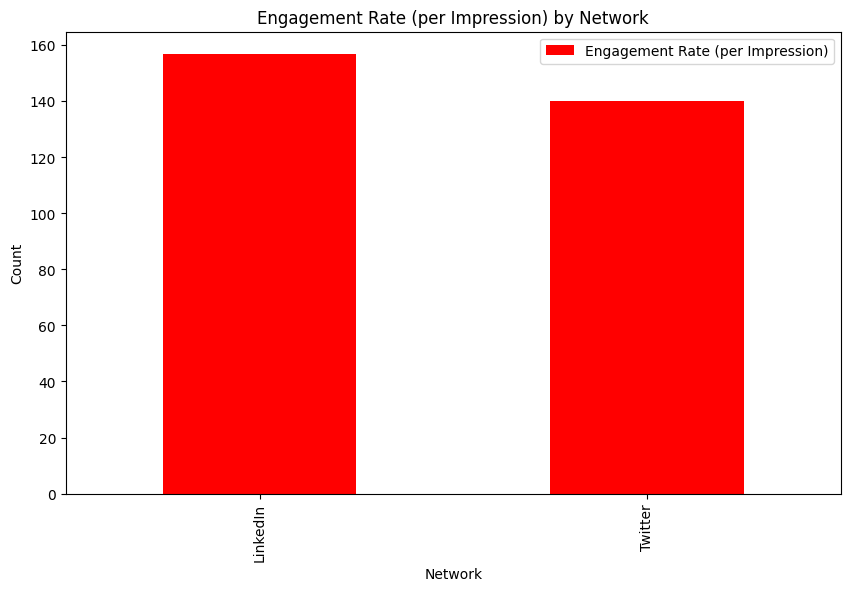

In [236]:
# Engament rae of twitter vs Linkedin
# Group by network and sum the likes, comments, and shares
grouped_data = network_imp.groupby('Network').agg({
    'Engagement Rate (per Impression)': 'sum'
}).reset_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', x='Network', y=['Engagement Rate (per Impression)'], color='red', ax=ax)
plt.title('Engagement Rate (per Impression) by Network')
plt.xlabel('Network')
plt.ylabel('Count')
plt.legend(['Engagement Rate (per Impression)'])
plt.show()